

This is a jupyter notebook describing the setup for fast and slow cooling rate of amorphous hydrogenated germanium. For this, we have taken the sample and heated it up to 490K. And then, they were cooled with different cooling rates. 

I am going ot test the hypothesis that claims that the equiliberation temperature for different annealing points.

Fast cool = 12-15K per minute

Slow cool = 1K per minute

During this process, their conductivity was measured. And now here I present their conducitivity with respect to (1000/Temperature)

I will also calculate the ficitve temperature.

For that, first we need some function which I have done below.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import constants as c
import math
from IPython.display import Markdown
import annealed as an

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

err_sl = 0.06
forgive_sl = 30



In R1, we can clearly see that the conductivity due to slow and fast cool is almost the same. There is no significant differnt between the value. 

In R2, we can clearly see that the condictivity due to slow cool is higher than that of fast cool. 

Dividing them into these two regions give us an **equiliberation temperature of 474K**.

In R1, they have a straight line representing the conductivity and in R2, after the transition has taken place, slow and fast cool are still straight, but with different slopes.


Now, the expected formula for conductivity with repsect to temperature in such samples is 

$$\sigma = \sigma_0 e^{\left(\frac{-E_a}{K_bT}\right)}$$

$\sigma_0$ and $E_a$ are the initial conductivity and the activation energy of the sample. And we can calculate it seperately for R1 and R2. 



**The activation energy of the system in R1 is** 0.4555887252122939

**The initial conductivity of the system in R1 is** 224.70934306422643

**The activation energy of the system in fast cooling in R2 is** 0.521865373997234

**The initial conductivity of the system in fast cooling R2 is** 1217.7854974127863

**The activation energy of the system in slow cooling in R2 is** 0.5094452446570195

**The initial conductivity of the system in slow cooling R2 is** 1107.0008477590852

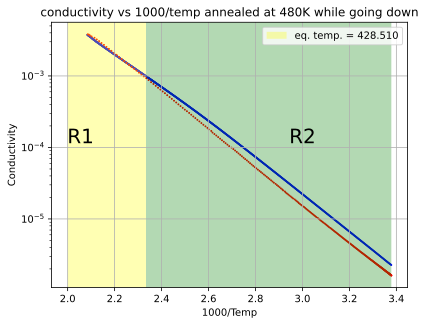

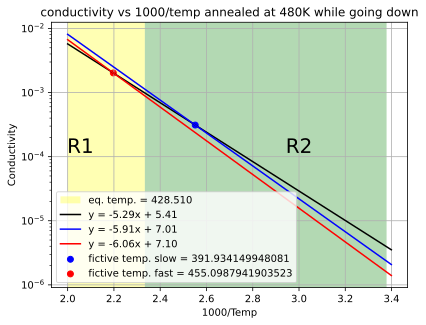

In [48]:
d480 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /slow cool/slow cool down 480.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /fast cool/fast cool down 480.csv", 
               temp = 480, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {d480["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {d480["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {d480["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {d480["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {d480["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {d480["R2_cond_o_slow"]}'))

plt.scatter(d480["thousand_over_temp_slow"], d480["cond_slow"], s=1, color='blue')
plt.scatter(d480["thousand_over_temp_fast"], d480["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=d480["thousand_over_temp_slow"][d480["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/d480["thousand_over_temp_slow"][d480["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= d480["thousand_over_temp_slow"][d480["R1_end_slow"]-1], xmax=max(max(d480["thousand_over_temp_slow"]), max(d480["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(d480["cond_slow"]), max(d480["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(d480["cond_slow"]), max(d480["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 480K while going down") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=d480["thousand_over_temp_slow"][d480["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/d480["thousand_over_temp_slow"][d480["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= d480["thousand_over_temp_slow"][d480["R1_end_slow"]-1], xmax=max(max(d480["thousand_over_temp_slow"]), max(d480["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(d480["cond_slow"]), max(d480["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(d480["cond_slow"]), max(d480["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, d480["R1_fit_line_slow"], color='black', label=(f'y = {d480["R1_slope_slow"]:.2f}x + {d480["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, d480["R2_fit_line_slow"], color='blue', label=(f'y = {d480["R2_slope_slow"]:.2f}x + {d480["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, d480["R2_fit_line_fast"], color='red', label=(f'y = {d480["R2_slope_fast"]:.2f}x + {d480["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(d480["pt_slow_x"])], [float(d480["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/d480["pt_slow_x"]}')
plt.scatter([float(d480["pt_fast_x"])], [float(d480["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/d480["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 480K while going down") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

**The activation energy of the system in R1 is** 0.513220149653647

**The initial conductivity of the system in R1 is** 1265.7127016998502

**The activation energy of the system in fast cooling in R2 is** 0.4760634999157293

**The initial conductivity of the system in fast cooling R2 is** 379.5272479259151

**The activation energy of the system in slow cooling in R2 is** 0.4200021699179124

**The initial conductivity of the system in slow cooling R2 is** 93.75545261078751

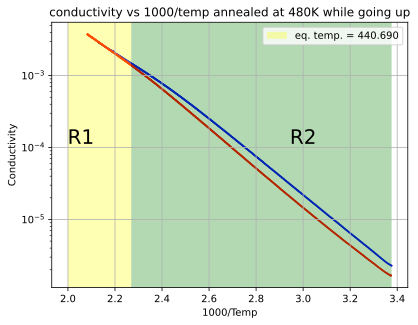

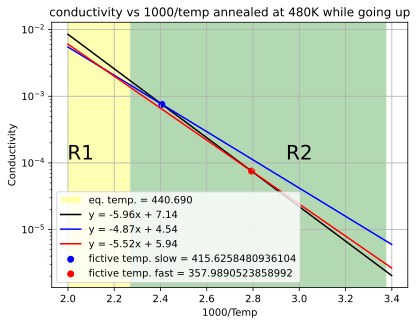

In [49]:
u480 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /slow cool/slow cool up 480.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /fast cool/fast cool up 480.csv", 
               temp = 480, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {u480["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {u480["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {u480["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {u480["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {u480["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {u480["R2_cond_o_slow"]}'))

plt.scatter(u480["thousand_over_temp_slow"], u480["cond_slow"], s=1, color='blue')
plt.scatter(u480["thousand_over_temp_fast"], u480["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=u480["thousand_over_temp_slow"][u480["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/u480["thousand_over_temp_slow"][u480["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= u480["thousand_over_temp_slow"][u480["R1_end_slow"]-1], xmax=max(max(u480["thousand_over_temp_slow"]), max(u480["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(u480["cond_slow"]), max(u480["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(u480["cond_slow"]), max(u480["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 480K while going up") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=u480["thousand_over_temp_slow"][u480["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/u480["thousand_over_temp_slow"][u480["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= u480["thousand_over_temp_slow"][u480["R1_end_slow"]-1], xmax=max(max(u480["thousand_over_temp_slow"]), max(u480["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(u480["cond_slow"]), max(u480["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(u480["cond_slow"]), max(u480["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, u480["R1_fit_line_slow"], color='black', label=(f'y = {u480["R1_slope_slow"]:.2f}x + {u480["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, u480["R2_fit_line_slow"], color='blue', label=(f'y = {u480["R2_slope_slow"]:.2f}x + {u480["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, u480["R2_fit_line_fast"], color='red', label=(f'y = {u480["R2_slope_fast"]:.2f}x + {u480["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(u480["pt_slow_x"])], [float(u480["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/u480["pt_slow_x"]}')
plt.scatter([float(u480["pt_fast_x"])], [float(u480["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/u480["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 480K while going up") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()



**The activation energy of the system in R1 is** 0.44597639043392107

**The initial conductivity of the system in R1 is** 179.93819309338033

**The activation energy of the system in fast cooling in R2 is** 0.5291920595189329

**The initial conductivity of the system in fast cooling R2 is** 1675.3270475643158

**The activation energy of the system in slow cooling in R2 is** 0.5115516059181399

**The initial conductivity of the system in slow cooling R2 is** 1222.5073074583634

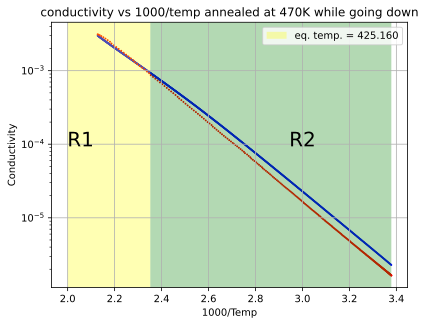

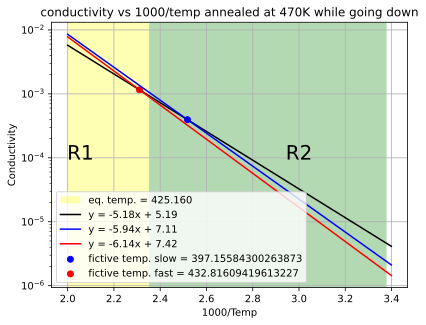

In [50]:
d470 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /slow cool/slow cool down 470.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /fast cool/fast cool down 470.csv", 
               temp = 470, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {d470["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {d470["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {d470["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {d470["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {d470["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {d470["R2_cond_o_slow"]}'))

plt.scatter(d470["thousand_over_temp_slow"], d470["cond_slow"], s=1, color='blue')
plt.scatter(d470["thousand_over_temp_fast"], d470["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=d470["thousand_over_temp_slow"][d470["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/d470["thousand_over_temp_slow"][d470["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= d470["thousand_over_temp_slow"][d470["R1_end_slow"]-1], xmax=max(max(d470["thousand_over_temp_slow"]), max(d470["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(d470["cond_slow"]), max(d470["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(d470["cond_slow"]), max(d470["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 470K while going down") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()


plt.axvspan(xmin=2.0, xmax=d470["thousand_over_temp_slow"][d470["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/d470["thousand_over_temp_slow"][d470["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= d470["thousand_over_temp_slow"][d470["R1_end_slow"]-1], xmax=max(max(d470["thousand_over_temp_slow"]), max(d470["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(d470["cond_slow"]), max(d470["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(d470["cond_slow"]), max(d470["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, d470["R1_fit_line_slow"], color='black', label=(f'y = {d470["R1_slope_slow"]:.2f}x + {d470["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, d470["R2_fit_line_slow"], color='blue', label=(f'y = {d470["R2_slope_slow"]:.2f}x + {d470["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, d470["R2_fit_line_fast"], color='red', label=(f'y = {d470["R2_slope_fast"]:.2f}x + {d470["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(d470["pt_slow_x"])], [float(d470["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/d470["pt_slow_x"]}')
plt.scatter([float(d470["pt_fast_x"])], [float(d470["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/d470["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 470K while going down") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()



**The activation energy of the system in R1 is** 0.5062674107030462

**The initial conductivity of the system in R1 is** 1145.3800363396306

**The activation energy of the system in fast cooling in R2 is** 0.4746923166858995

**The initial conductivity of the system in fast cooling R2 is** 390.5017641388952

**The activation energy of the system in slow cooling in R2 is** 0.4020794976045667

**The initial conductivity of the system in slow cooling R2 is** 61.72110499201525

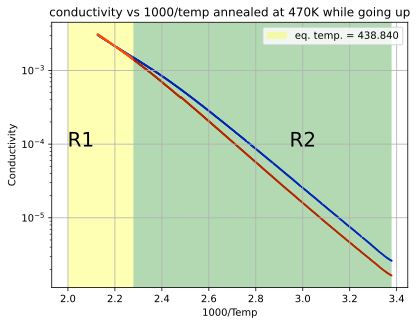

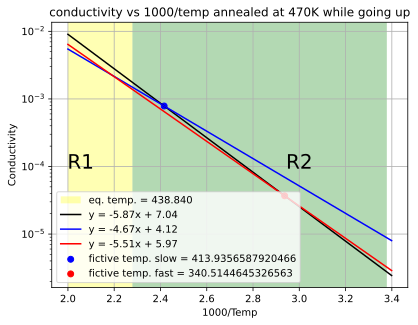

In [51]:
u470 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /slow cool/slow cool up 470.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /fast cool/fast cool up 470.csv", 
               temp = 470, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {u470["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {u470["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {u470["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {u470["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {u470["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {u470["R2_cond_o_slow"]}'))

plt.scatter(u470["thousand_over_temp_slow"], u470["cond_slow"], s=1, color='blue')
plt.scatter(u470["thousand_over_temp_fast"], u470["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=u470["thousand_over_temp_slow"][u470["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/u470["thousand_over_temp_slow"][u470["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= u470["thousand_over_temp_slow"][u470["R1_end_slow"]-1], xmax=max(max(u470["thousand_over_temp_slow"]), max(u470["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(u470["cond_slow"]), max(u470["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(u470["cond_slow"]), max(u470["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 470K while going up") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=u470["thousand_over_temp_slow"][u470["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/u470["thousand_over_temp_slow"][u470["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= u470["thousand_over_temp_slow"][u470["R1_end_slow"]-1], xmax=max(max(u470["thousand_over_temp_slow"]), max(u470["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(u470["cond_slow"]), max(u470["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(u470["cond_slow"]), max(u470["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, u470["R1_fit_line_slow"], color='black', label=(f'y = {u470["R1_slope_slow"]:.2f}x + {u470["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, u470["R2_fit_line_slow"], color='blue', label=(f'y = {u470["R2_slope_slow"]:.2f}x + {u470["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, u470["R2_fit_line_fast"], color='red', label=(f'y = {u470["R2_slope_fast"]:.2f}x + {u470["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(u470["pt_slow_x"])], [float(u470["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/u470["pt_slow_x"]}')
plt.scatter([float(u470["pt_fast_x"])], [float(u470["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/u470["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 470K while going up") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()



**The activation energy of the system in R1 is** 0.4445116828834035

**The initial conductivity of the system in R1 is** 169.4572090001513

**The activation energy of the system in fast cooling in R2 is** 0.5317694503736946

**The initial conductivity of the system in fast cooling R2 is** 1627.3172023275786

**The activation energy of the system in slow cooling in R2 is** 0.5096786190485373

**The initial conductivity of the system in slow cooling R2 is** 1140.7894554694003

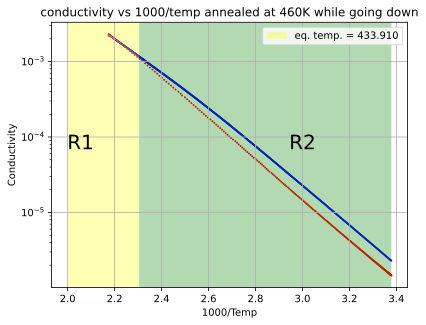

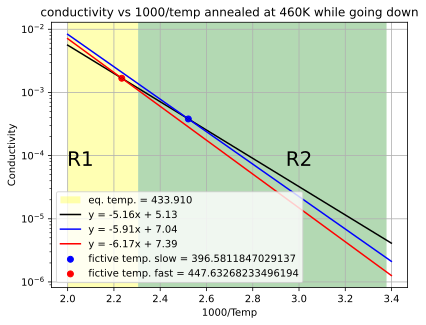

In [52]:
d460 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /slow cool/slow cool down 460.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /fast cool/fast cool down 460.csv", 
               temp = 460, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {d460["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {d460["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {d460["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {d460["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {d460["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {d460["R2_cond_o_slow"]}'))

plt.scatter(d460["thousand_over_temp_slow"], d460["cond_slow"], s=1, color='blue')
plt.scatter(d460["thousand_over_temp_fast"], d460["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=d460["thousand_over_temp_slow"][d460["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/d460["thousand_over_temp_slow"][d460["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= d460["thousand_over_temp_slow"][d460["R1_end_slow"]-1], xmax=max(max(d460["thousand_over_temp_slow"]), max(d460["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(d460["cond_slow"]), max(d460["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(d460["cond_slow"]), max(d460["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 460K while going down") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=d460["thousand_over_temp_slow"][d460["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/d460["thousand_over_temp_slow"][d460["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= d460["thousand_over_temp_slow"][d460["R1_end_slow"]-1], xmax=max(max(d460["thousand_over_temp_slow"]), max(d460["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(d460["cond_slow"]), max(d460["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(d460["cond_slow"]), max(d460["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, d460["R1_fit_line_slow"], color='black', label=(f'y = {d460["R1_slope_slow"]:.2f}x + {d460["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, d460["R2_fit_line_slow"], color='blue', label=(f'y = {d460["R2_slope_slow"]:.2f}x + {d460["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, d460["R2_fit_line_fast"], color='red', label=(f'y = {d460["R2_slope_fast"]:.2f}x + {d460["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(d460["pt_slow_x"])], [float(d460["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/d460["pt_slow_x"]}')
plt.scatter([float(d460["pt_fast_x"])], [float(d460["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/d460["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 460K while going down") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()


**The activation energy of the system in R1 is** 0.5040491532569866

**The initial conductivity of the system in R1 is** 976.8505748342859

**The activation energy of the system in fast cooling in R2 is** 0.4722267586146735

**The initial conductivity of the system in fast cooling R2 is** 336.3996254134121

**The activation energy of the system in slow cooling in R2 is** 0.40868273298710495

**The initial conductivity of the system in slow cooling R2 is** 70.73340076491594

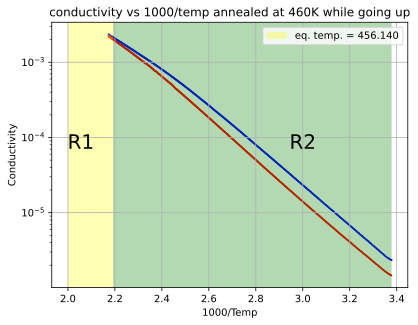

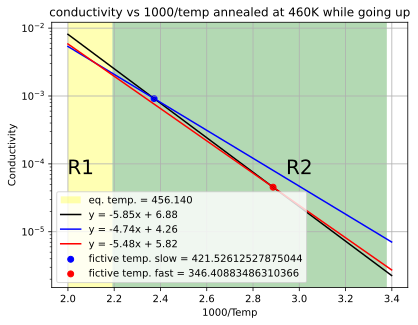

In [53]:
u460 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /slow cool/slow cool up 460.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /fast cool/fast cool up 460.csv", 
               temp = 460, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {u460["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {u460["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {u460["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {u460["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {u460["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {u460["R2_cond_o_slow"]}'))

plt.scatter(u460["thousand_over_temp_slow"], u460["cond_slow"], s=1, color='blue')
plt.scatter(u460["thousand_over_temp_fast"], u460["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=u460["thousand_over_temp_slow"][u460["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/u460["thousand_over_temp_slow"][u460["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= u460["thousand_over_temp_slow"][u460["R1_end_slow"]-1], xmax=max(max(u460["thousand_over_temp_slow"]), max(u460["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(u460["cond_slow"]), max(u460["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(u460["cond_slow"]), max(u460["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 460K while going up") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=u460["thousand_over_temp_slow"][u460["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/u460["thousand_over_temp_slow"][u460["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= u460["thousand_over_temp_slow"][u460["R1_end_slow"]-1], xmax=max(max(u460["thousand_over_temp_slow"]), max(u460["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(u460["cond_slow"]), max(u460["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(u460["cond_slow"]), max(u460["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, u460["R1_fit_line_slow"], color='black', label=(f'y = {u460["R1_slope_slow"]:.2f}x + {u460["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, u460["R2_fit_line_slow"], color='blue', label=(f'y = {u460["R2_slope_slow"]:.2f}x + {u460["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, u460["R2_fit_line_fast"], color='red', label=(f'y = {u460["R2_slope_fast"]:.2f}x + {u460["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(u460["pt_slow_x"])], [float(u460["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/u460["pt_slow_x"]}')
plt.scatter([float(u460["pt_fast_x"])], [float(u460["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/u460["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 460K while going up") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

**The activation energy of the system in R1 is** 0.4461585187653954

**The initial conductivity of the system in R1 is** 178.4548440941416

**The activation energy of the system in fast cooling in R2 is** 0.531878170265654

**The initial conductivity of the system in fast cooling R2 is** 1780.2880047371466

**The activation energy of the system in slow cooling in R2 is** 0.5110521937790158

**The initial conductivity of the system in slow cooling R2 is** 1195.8506294496342

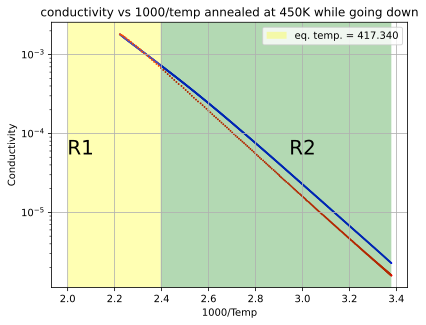

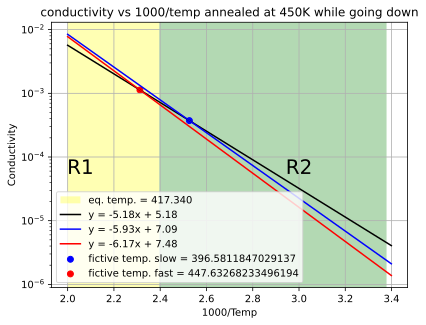

In [54]:
d450 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /slow cool/slow cool down 450.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /fast cool/fast cool down 450.csv", 
               temp = 450, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {d450["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {d450["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {d450["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {d450["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {d450["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {d450["R2_cond_o_slow"]}'))

plt.scatter(d450["thousand_over_temp_slow"], d450["cond_slow"], s=1, color='blue')
plt.scatter(d450["thousand_over_temp_fast"], d450["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=d450["thousand_over_temp_slow"][d450["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/d450["thousand_over_temp_slow"][d450["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= d450["thousand_over_temp_slow"][d450["R1_end_slow"]-1], xmax=max(max(d450["thousand_over_temp_slow"]), max(d450["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(d450["cond_slow"]), max(d450["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(d450["cond_slow"]), max(d450["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 450K while going down") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=d450["thousand_over_temp_slow"][d450["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/d450["thousand_over_temp_slow"][d450["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= d450["thousand_over_temp_slow"][d450["R1_end_slow"]-1], xmax=max(max(d450["thousand_over_temp_slow"]), max(d450["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(d450["cond_slow"]), max(d450["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(d450["cond_slow"]), max(d450["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, d450["R1_fit_line_slow"], color='black', label=(f'y = {d450["R1_slope_slow"]:.2f}x + {d450["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, d450["R2_fit_line_slow"], color='blue', label=(f'y = {d450["R2_slope_slow"]:.2f}x + {d450["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, d450["R2_fit_line_fast"], color='red', label=(f'y = {d450["R2_slope_fast"]:.2f}x + {d450["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(d450["pt_slow_x"])], [float(d450["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/d460["pt_slow_x"]}')
plt.scatter([float(d450["pt_fast_x"])], [float(d450["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/d460["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 450K while going down") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()


**The activation energy of the system in R1 is** 0.5124038992946002

**The initial conductivity of the system in R1 is** 1302.9361051739893

**The activation energy of the system in fast cooling in R2 is** 0.47972061020841533

**The initial conductivity of the system in fast cooling R2 is** 436.59163676418336

**The activation energy of the system in slow cooling in R2 is** 0.4129468155229124

**The initial conductivity of the system in slow cooling R2 is** 79.93481950024922

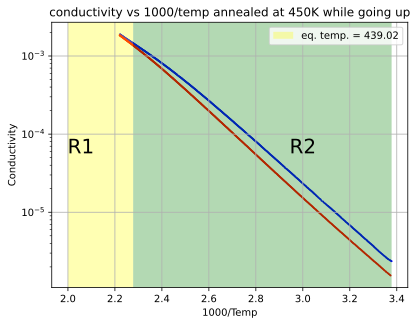

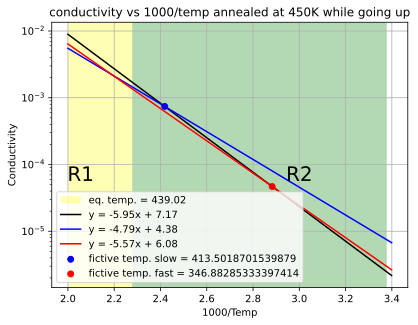

In [55]:
u450 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /slow cool/slow cool up 450.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool fixed time /fast cool/fast cool up 450.csv", 
               temp = 450, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {u450["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {u450["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {u450["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {u450["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {u450["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {u450["R2_cond_o_slow"]}'))

plt.scatter(u450["thousand_over_temp_slow"], u450["cond_slow"], s=1, color='blue')
plt.scatter(u450["thousand_over_temp_fast"], u450["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=u450["thousand_over_temp_slow"][u450["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {u450["eq_temp"]}'))
plt.axvspan(xmin= u450["thousand_over_temp_slow"][u450["R1_end_slow"]-1], xmax=max(max(u450["thousand_over_temp_slow"]), max(u450["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(u450["cond_slow"]), max(u450["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(u450["cond_slow"]), max(u450["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 450K while going up") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=u450["thousand_over_temp_slow"][u450["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {u450["eq_temp"]}'))
plt.axvspan(xmin= u450["thousand_over_temp_slow"][u450["R1_end_slow"]-1], xmax=max(max(u450["thousand_over_temp_slow"]), max(u450["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(u450["cond_slow"]), max(u450["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(u450["cond_slow"]), max(u450["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, u450["R1_fit_line_slow"], color='black', label=(f'y = {u450["R1_slope_slow"]:.2f}x + {u450["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, u450["R2_fit_line_slow"], color='blue', label=(f'y = {u450["R2_slope_slow"]:.2f}x + {u450["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, u450["R2_fit_line_fast"], color='red', label=(f'y = {u450["R2_slope_fast"]:.2f}x + {u450["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(u450["pt_slow_x"])], [float(u450["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {u450["fictive_temp_slow"]}')
plt.scatter([float(u450["pt_fast_x"])], [float(u450["pt_fast_y"])], color="red", label= f'fictive temp. fast = {u450["fictive_temp_fast"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 450K while going up") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()



In [56]:
equiliberation_temp_down = [d480["eq_temp"], d470["eq_temp"], d460["eq_temp"], d450["eq_temp"]]
equiliberation_temp_up = [u480["eq_temp"], u470["eq_temp"],u460["eq_temp"], u450["eq_temp"]]
fictive_temp_slow_up = [u480["fictive_temp_slow"], u470["fictive_temp_slow"],u460["fictive_temp_slow"], u450["fictive_temp_slow"]]
fictive_temp_fast_up = [u480["fictive_temp_fast"], u470["fictive_temp_fast"],u460["fictive_temp_fast"], u450["fictive_temp_fast"]]
fictive_temp_slow_down = [u480["fictive_temp_slow"], u470["fictive_temp_slow"],u460["fictive_temp_slow"], u450["fictive_temp_slow"]]
fictive_temp_fast_down = [u480["fictive_temp_fast"], u470["fictive_temp_fast"],u460["fictive_temp_fast"], u450["fictive_temp_fast"]]
temp = [480, 470, 460, 450]

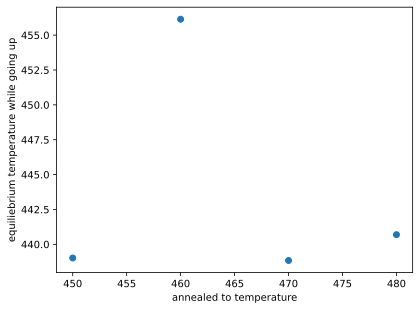

In [57]:
plt.scatter(temp, equiliberation_temp_up)
plt.xlabel("annealed to temperature")
plt.ylabel("equiliebrium temperature while going up")
plt.show()

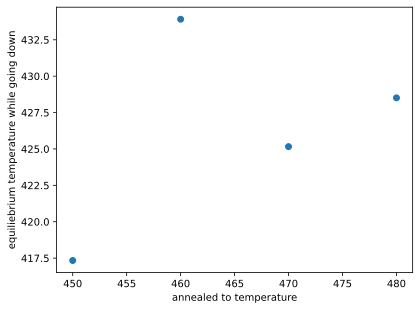

In [58]:
plt.scatter(temp, equiliberation_temp_down)
plt.xlabel("annealed to temperature")
plt.ylabel("equiliebrium temperature while going down")
plt.show()

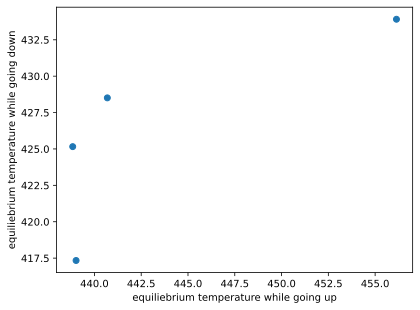

In [59]:
plt.scatter(equiliberation_temp_up, equiliberation_temp_down)
plt.xlabel("equiliebrium temperature while going up")
plt.ylabel("equiliebrium temperature while going down")
plt.show()

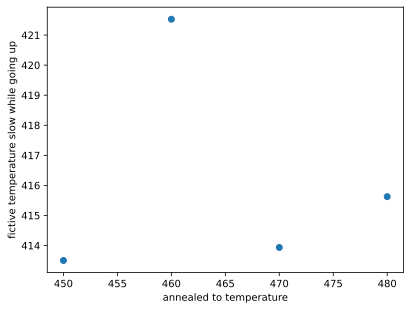

In [60]:
plt.scatter(temp, fictive_temp_slow_up)
plt.xlabel("annealed to temperature")
plt.ylabel("fictive temperature slow while going up")
plt.show()

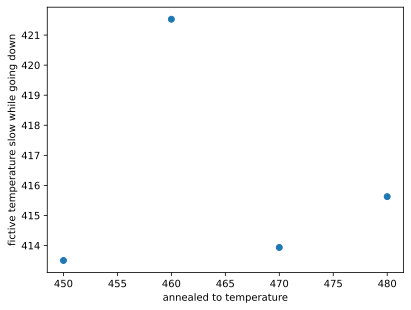

In [61]:
plt.scatter(temp, fictive_temp_slow_down)
plt.xlabel("annealed to temperature")
plt.ylabel("fictive temperature slow while going down")
plt.show()

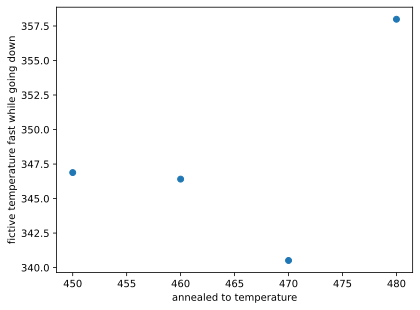

In [62]:
plt.scatter(temp, fictive_temp_fast_down)
plt.xlabel("annealed to temperature")
plt.ylabel("fictive temperature fast while going down")
plt.show()

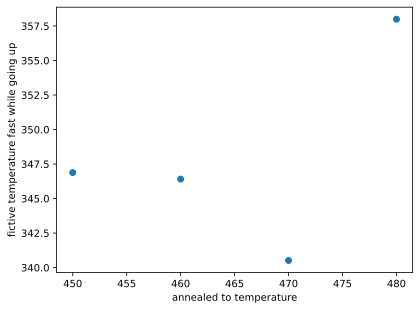

In [63]:
plt.scatter(temp, fictive_temp_fast_up)
plt.xlabel("annealed to temperature")
plt.ylabel("fictive temperature fast while going up")
plt.show()

In [64]:
init_cond_down = [d480["R1_cond_o"],d470["R1_cond_o"],d460["R1_cond_o"],d450["R1_cond_o"]]
activation_energy_down = [d480["R1_activation"],d470["R1_activation"],d460["R1_activation"],d450["R1_activation"]]
init_cond_up = [u480["R1_cond_o"],u470["R1_cond_o"],u460["R1_cond_o"],u450["R1_cond_o"]]
activation_energy_up = [u480["R1_activation"],u470["R1_activation"],u460["R1_activation"],u450["R1_activation"]]

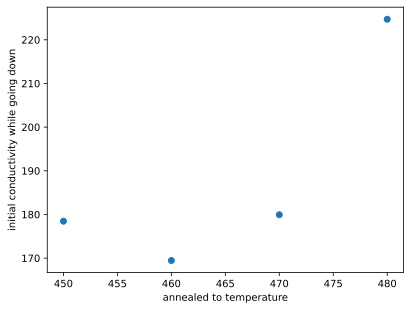

In [65]:
plt.scatter(temp, init_cond_down)
plt.xlabel("annealed to temperature")
plt.ylabel("initial conductivity while going down")
plt.show()

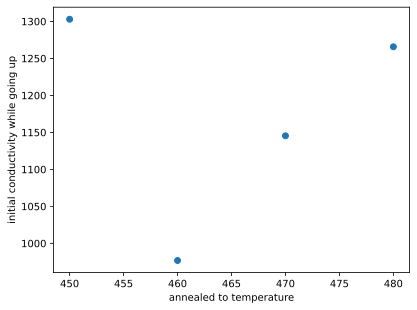

In [66]:
plt.scatter(temp, init_cond_up)
plt.xlabel("annealed to temperature")
plt.ylabel("initial conductivity while going up")
plt.show()

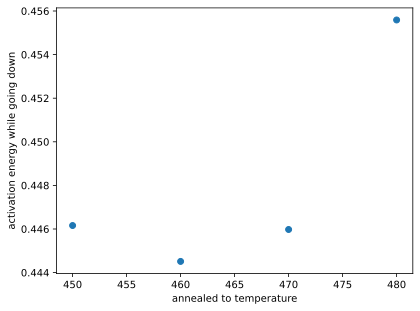

In [67]:
plt.scatter(temp, activation_energy_down)
plt.xlabel("annealed to temperature")
plt.ylabel("activation energy while going down")
plt.show()

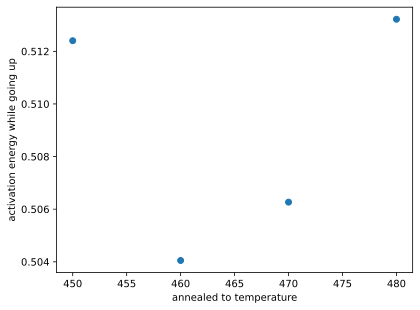

In [68]:
plt.scatter(temp, activation_energy_up)
plt.xlabel("annealed to temperature")
plt.ylabel("activation energy while going up")
plt.show()

**The activation energy of the system in R1 is** 0.4443851298365024

**The initial conductivity of the system in R1 is** 208.0907083477229

**The activation energy of the system in fast cooling in R2 is** 0.5333543221913348

**The initial conductivity of the system in fast cooling R2 is** 2386.6019163001292

**The activation energy of the system in slow cooling in R2 is** 0.5093662650574553

**The initial conductivity of the system in slow cooling R2 is** 1386.910501264565

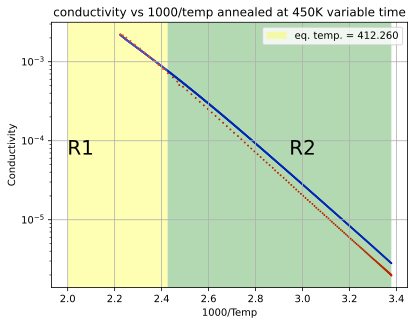

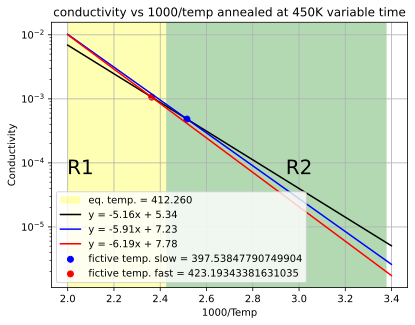

In [69]:
v450 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/slow cool/slow_cool_at_450.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/fast cool/fast_cool_at_450.csv", 
               temp = 450, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {v450["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {v450["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {v450["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {v450["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {v450["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {v450["R2_cond_o_slow"]}'))

plt.scatter(v450["thousand_over_temp_slow"], v450["cond_slow"], s=1, color='blue')
plt.scatter(v450["thousand_over_temp_fast"], v450["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=v450["thousand_over_temp_slow"][v450["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v450["thousand_over_temp_slow"][v450["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v450["thousand_over_temp_slow"][v450["R1_end_slow"]-1], xmax=max(max(v450["thousand_over_temp_slow"]), max(v450["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v450["cond_slow"]), max(v450["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v450["cond_slow"]), max(v450["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')


plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 450K variable time") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=v450["thousand_over_temp_slow"][v450["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v450["thousand_over_temp_slow"][v450["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v450["thousand_over_temp_slow"][v450["R1_end_slow"]-1], xmax=max(max(v450["thousand_over_temp_slow"]), max(v450["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v450["cond_slow"]), max(v450["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v450["cond_slow"]), max(v450["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, v450["R1_fit_line_slow"], color='black', label=(f'y = {v450["R1_slope_slow"]:.2f}x + {v450["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v450["R2_fit_line_slow"], color='blue', label=(f'y = {v450["R2_slope_slow"]:.2f}x + {v450["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v450["R2_fit_line_fast"], color='red', label=(f'y = {v450["R2_slope_fast"]:.2f}x + {v450["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(v450["pt_slow_x"])], [float(v450["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/v450["pt_slow_x"]}')
plt.scatter([float(v450["pt_fast_x"])], [float(v450["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/v450["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 450K variable time")
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

**The activation energy of the system in R1 is** 0.4322363438967715

**The initial conductivity of the system in R1 is** 142.1752168534082

**The activation energy of the system in fast cooling in R2 is** 0.5310788049967401

**The initial conductivity of the system in fast cooling R2 is** 2060.4481819541434

**The activation energy of the system in slow cooling in R2 is** 0.5044587647311046

**The initial conductivity of the system in slow cooling R2 is** 1168.598471500259

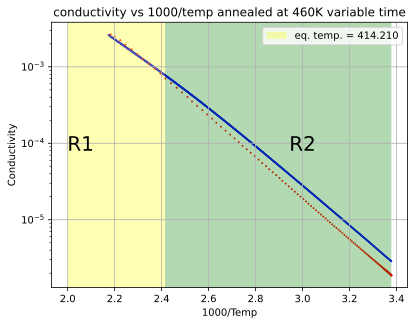

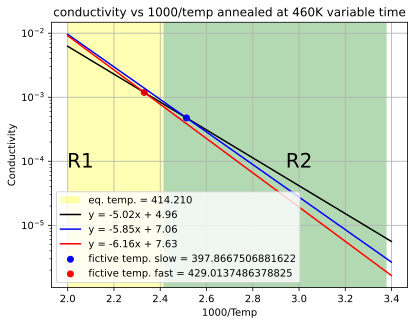

In [70]:
v460 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/slow cool/slow_cool_at_460.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/fast cool/fast_cool_at_460.csv", 
               temp = 460, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {v460["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {v460["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {v460["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {v460["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {v460["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {v460["R2_cond_o_slow"]}'))

plt.scatter(v460["thousand_over_temp_slow"], v460["cond_slow"], s=1, color='blue')
plt.scatter(v460["thousand_over_temp_fast"], v460["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=v460["thousand_over_temp_slow"][v460["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v460["thousand_over_temp_slow"][v460["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v460["thousand_over_temp_slow"][v460["R1_end_slow"]-1], xmax=max(max(v460["thousand_over_temp_slow"]), max(v460["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v460["cond_slow"]), max(v460["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v460["cond_slow"]), max(v460["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')


plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 460K variable time") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=v460["thousand_over_temp_slow"][v460["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v460["thousand_over_temp_slow"][v460["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v460["thousand_over_temp_slow"][v460["R1_end_slow"]-1], xmax=max(max(v460["thousand_over_temp_slow"]), max(v460["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v460["cond_slow"]), max(v460["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v460["cond_slow"]), max(v460["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, v460["R1_fit_line_slow"], color='black', label=(f'y = {v460["R1_slope_slow"]:.2f}x + {v460["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v460["R2_fit_line_slow"], color='blue', label=(f'y = {v460["R2_slope_slow"]:.2f}x + {v460["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v460["R2_fit_line_fast"], color='red', label=(f'y = {v460["R2_slope_fast"]:.2f}x + {v460["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(v460["pt_slow_x"])], [float(v460["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/v460["pt_slow_x"]}')
plt.scatter([float(v460["pt_fast_x"])], [float(v460["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/v460["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 460K variable time")
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

**The activation energy of the system in R1 is** 0.4551022577343191

**The initial conductivity of the system in R1 is** 284.46808861419174

**The activation energy of the system in fast cooling in R2 is** 0.5347181487373683

**The initial conductivity of the system in fast cooling R2 is** 2224.9964551049925

**The activation energy of the system in slow cooling in R2 is** 0.5079576961977175

**The initial conductivity of the system in slow cooling R2 is** 1383.8481107468135

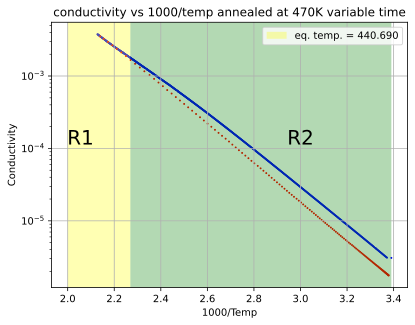

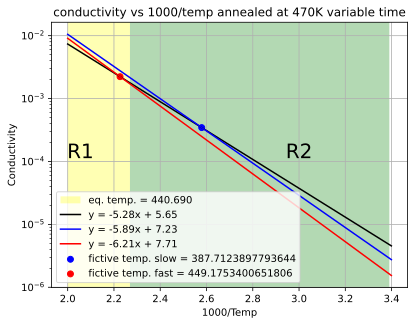

In [71]:
v470 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/slow cool/slow_cool_at_470.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/fast cool/fast_cool_at_470.csv", 
               temp = 470, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {v470["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {v470["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {v470["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {v470["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {v470["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {v470["R2_cond_o_slow"]}'))

plt.scatter(v470["thousand_over_temp_slow"], v470["cond_slow"], s=1, color='blue')
plt.scatter(v470["thousand_over_temp_fast"], v470["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=v470["thousand_over_temp_slow"][v470["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v470["thousand_over_temp_slow"][v470["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v470["thousand_over_temp_slow"][v470["R1_end_slow"]-1], xmax=max(max(v470["thousand_over_temp_slow"]), max(v470["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v470["cond_slow"]), max(v470["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v470["cond_slow"]), max(v470["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

# plt.plot(an.x, v470["R1_fit_line_slow"], color='black',linestyle='--', label=(f'y = {v470["R1_slope_slow"]:.2f}x + {v470["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 470K variable time") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=v470["thousand_over_temp_slow"][v470["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v470["thousand_over_temp_slow"][v470["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v470["thousand_over_temp_slow"][v470["R1_end_slow"]-1], xmax=max(max(v470["thousand_over_temp_slow"]), max(v470["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v470["cond_slow"]), max(v470["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v470["cond_slow"]), max(v470["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, v470["R1_fit_line_slow"], color='black', label=(f'y = {v470["R1_slope_slow"]:.2f}x + {v470["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v470["R2_fit_line_slow"], color='blue', label=(f'y = {v470["R2_slope_slow"]:.2f}x + {v470["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v470["R2_fit_line_fast"], color='red', label=(f'y = {v470["R2_slope_fast"]:.2f}x + {v470["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(v470["pt_slow_x"])], [float(v470["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/v470["pt_slow_x"]}')
plt.scatter([float(v470["pt_fast_x"])], [float(v470["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/v470["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 470K variable time") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

**The activation energy of the system in R1 is** 0.44899965020373783

**The initial conductivity of the system in R1 is** 230.98744344460212

**The activation energy of the system in fast cooling in R2 is** 0.5300172617081444

**The initial conductivity of the system in fast cooling R2 is** 1845.3561274298254

**The activation energy of the system in slow cooling in R2 is** 0.5077590442847428

**The initial conductivity of the system in slow cooling R2 is** 1313.7272155773242

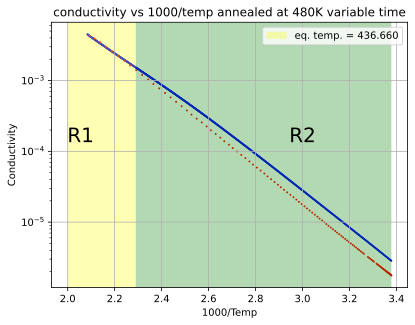

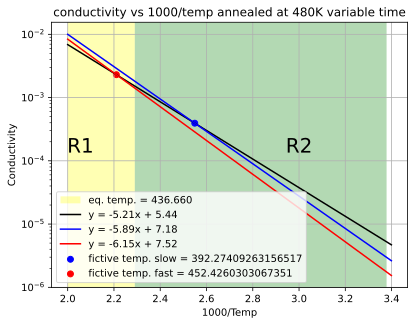

In [72]:
v480 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/slow cool/slow_cool_at_480.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/fast cool/fast_cool_at_480.csv", 
               temp = 480, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {v480["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {v480["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {v480["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {v480["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {v480["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {v480["R2_cond_o_slow"]}'))

plt.scatter(v480["thousand_over_temp_slow"], v480["cond_slow"], s=1, color='blue')
plt.scatter(v480["thousand_over_temp_fast"], v480["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=v480["thousand_over_temp_slow"][v480["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v480["thousand_over_temp_slow"][v480["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v480["thousand_over_temp_slow"][v480["R1_end_slow"]-1], xmax=max(max(v480["thousand_over_temp_slow"]), max(v480["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v480["cond_slow"]), max(v480["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v480["cond_slow"]), max(v480["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')


plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 480K variable time") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=v480["thousand_over_temp_slow"][v480["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v480["thousand_over_temp_slow"][v480["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v480["thousand_over_temp_slow"][v480["R1_end_slow"]-1], xmax=max(max(v480["thousand_over_temp_slow"]), max(v480["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v480["cond_slow"]), max(v480["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v480["cond_slow"]), max(v480["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, v480["R1_fit_line_slow"], color='black', label=(f'y = {v480["R1_slope_slow"]:.2f}x + {v480["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v480["R2_fit_line_slow"], color='blue', label=(f'y = {v480["R2_slope_slow"]:.2f}x + {v480["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v480["R2_fit_line_fast"], color='red', label=(f'y = {v480["R2_slope_fast"]:.2f}x + {v480["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(v480["pt_slow_x"])], [float(v480["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/v480["pt_slow_x"]}')
plt.scatter([float(v480["pt_fast_x"])], [float(v480["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/v480["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 480K variable time") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

**The activation energy of the system in R1 is** 0.435836132389696

**The initial conductivity of the system in R1 is** 153.51664985823317

**The activation energy of the system in fast cooling in R2 is** 0.5316008032501015

**The initial conductivity of the system in fast cooling R2 is** 2094.4378526602163

**The activation energy of the system in slow cooling in R2 is** 0.5054520576040679

**The initial conductivity of the system in slow cooling R2 is** 1181.749444341421

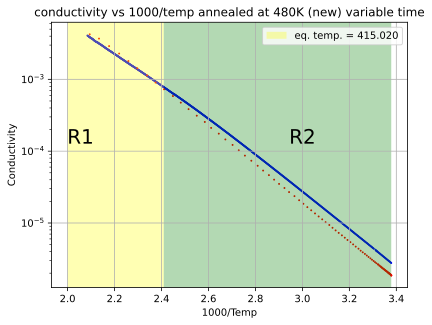

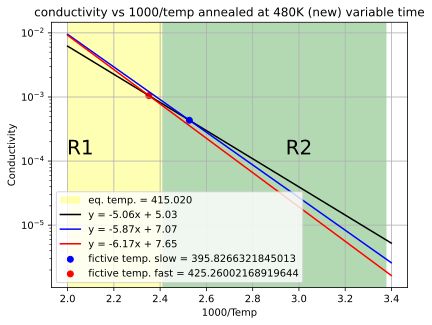

In [73]:
v480_new = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/slow cool/slow_cool_at_480_new.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/fast cool/fast_cool_at_480_new.csv", 
               temp = 480, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {v480_new["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {v480_new["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {v480_new["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {v480_new["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {v480_new["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {v480_new["R2_cond_o_slow"]}'))

plt.scatter(v480_new["thousand_over_temp_slow"], v480_new["cond_slow"], s=1, color='blue')
plt.scatter(v480_new["thousand_over_temp_fast"], v480_new["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=v480_new["thousand_over_temp_slow"][v480_new["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v480_new["thousand_over_temp_slow"][v480_new["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v480_new["thousand_over_temp_slow"][v480_new["R1_end_slow"]-1], xmax=max(max(v480_new["thousand_over_temp_slow"]), max(v480_new["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v480_new["cond_slow"]), max(v480_new["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v480_new["cond_slow"]), max(v480_new["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')


plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 480K (new) variable time") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=v480_new["thousand_over_temp_slow"][v480_new["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v480_new["thousand_over_temp_slow"][v480_new["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v480_new["thousand_over_temp_slow"][v480_new["R1_end_slow"]-1], xmax=max(max(v480_new["thousand_over_temp_slow"]), max(v480_new["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v480_new["cond_slow"]), max(v480_new["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v480_new["cond_slow"]), max(v480_new["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, v480_new["R1_fit_line_slow"], color='black', label=(f'y = {v480_new["R1_slope_slow"]:.2f}x + {v480_new["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v480_new["R2_fit_line_slow"], color='blue', label=(f'y = {v480_new["R2_slope_slow"]:.2f}x + {v480_new["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v480_new["R2_fit_line_fast"], color='red', label=(f'y = {v480_new["R2_slope_fast"]:.2f}x + {v480_new["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(v480_new["pt_slow_x"])], [float(v480_new["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/v480_new["pt_slow_x"]}')
plt.scatter([float(v480_new["pt_fast_x"])], [float(v480_new["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/v480_new["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 480K (new) variable time") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

**The activation energy of the system in R1 is** 0.4657893122148736

**The initial conductivity of the system in R1 is** 343.9370067210489

**The activation energy of the system in fast cooling in R2 is** 0.5270596970213758

**The initial conductivity of the system in fast cooling R2 is** 1476.7420998068046

**The activation energy of the system in slow cooling in R2 is** 0.5111087902182153

**The initial conductivity of the system in slow cooling R2 is** 1364.1549656061666

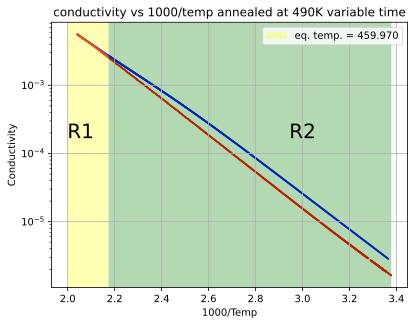

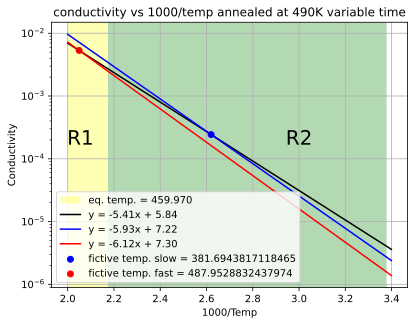

In [74]:
v490 = an.game(slow_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/slow cool/slow_cool_at_490.csv", 
               fast_file_name="/workspaces/kakalioslab/fast and slow cooling/fast and slow cool/fast and slow cool variable time/fast cool/fast_cool_at_490.csv", 
               temp = 490, err_lim_same_line= err_sl, forgiveness_num_same_line=forgive_sl)

display(Markdown(f'**The activation energy of the system in R1 is** {v490["R1_activation"]}'))
display(Markdown(f'**The initial conductivity of the system in R1 is** {v490["R1_cond_o"]}'))

display(Markdown(f'**The activation energy of the system in fast cooling in R2 is** {v490["R2_activation_fast"]}'))
display(Markdown(f'**The initial conductivity of the system in fast cooling R2 is** {v490["R2_cond_o_fast"]}'))

display(Markdown(f'**The activation energy of the system in slow cooling in R2 is** {v490["R2_activation_slow"]}'))
display(Markdown(f'**The initial conductivity of the system in slow cooling R2 is** {v490["R2_cond_o_slow"]}'))

plt.scatter(v490["thousand_over_temp_slow"], v490["cond_slow"], s=1, color='blue')
plt.scatter(v490["thousand_over_temp_fast"], v490["cond_fast"], s=1, color='red')

plt.axvspan(xmin=2.0, xmax=v490["thousand_over_temp_slow"][v490["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v490["thousand_over_temp_slow"][v490["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v490["thousand_over_temp_slow"][v490["R1_end_slow"]-1], xmax=max(max(v490["thousand_over_temp_slow"]), max(v490["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v490["cond_slow"]), max(v490["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v490["cond_slow"]), max(v490["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

# plt.plot(an.x, v490["R1_fit_line_slow"], color='black',linestyle='--', label=(f'y = {v490["R1_slope_slow"]:.2f}x + {v490["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 490K variable time") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

plt.axvspan(xmin=2.0, xmax=v490["thousand_over_temp_slow"][v490["R1_end_slow"]-1], facecolor='yellow', alpha=0.3, label= (f'eq. temp. = {1000/v490["thousand_over_temp_slow"][v490["R1_end_slow"]-1]:.3f}'))
plt.axvspan(xmin= v490["thousand_over_temp_slow"][v490["R1_end_slow"]-1], xmax=max(max(v490["thousand_over_temp_slow"]), max(v490["thousand_over_temp_fast"])), facecolor='green', alpha=0.3)

plt.text(2.055, max(max(v490["cond_slow"]), max(v490["cond_fast"])) * 0.03, 'R1', fontsize=20, color='black', ha='center')
plt.text(3.0, max(max(v490["cond_slow"]), max(v490["cond_fast"])) * 0.03, 'R2', fontsize=20, color='black', ha='center')

plt.plot(an.x, v490["R1_fit_line_slow"], color='black', label=(f'y = {v490["R1_slope_slow"]:.2f}x + {v490["R1_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v490["R2_fit_line_slow"], color='blue', label=(f'y = {v490["R2_slope_slow"]:.2f}x + {v490["R2_intercept_slow"]:.2f}'))  # Add the fit line to the plot
plt.plot(an.x, v490["R2_fit_line_fast"], color='red', label=(f'y = {v490["R2_slope_fast"]:.2f}x + {v490["R2_intercept_fast"]:.2f}'))  # Add the fit line to the plot

plt.scatter([float(v490["pt_slow_x"])], [float(v490["pt_slow_y"])], color="blue", label= f'fictive temp. slow = {1000/v490["pt_slow_x"]}')
plt.scatter([float(v490["pt_fast_x"])], [float(v490["pt_fast_y"])], color="red", label= f'fictive temp. fast = {1000/v490["pt_fast_x"]}')

plt.xlabel('1000/Temp') 
plt.ylabel('Conductivity') 
plt.title("conductivity vs 1000/temp annealed at 490K variable time") 
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()

In [75]:
equiliberation_temp_variable = [v490["eq_temp"],v480["eq_temp"], v470["eq_temp"], v460["eq_temp"], v450["eq_temp"]]
fictive_temp_slow_variable = [v490["fictive_temp_slow"],v480["fictive_temp_slow"], v470["fictive_temp_slow"],v460["fictive_temp_slow"], v450["fictive_temp_slow"]]
fictive_temp_fast_variable = [v490["fictive_temp_fast"],v480["fictive_temp_fast"], v470["fictive_temp_fast"],v460["fictive_temp_fast"], v450["fictive_temp_fast"]]
temp = [490,480, 470, 460, 450]

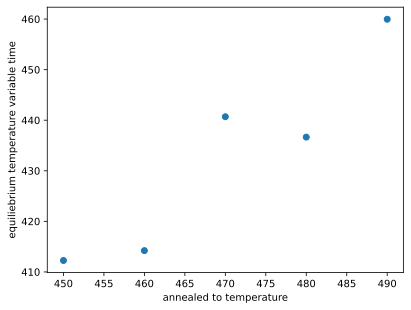

In [76]:
plt.scatter(temp, equiliberation_temp_variable)
plt.xlabel("annealed to temperature")
plt.ylabel("equiliebrium temperature variable time")
plt.show()

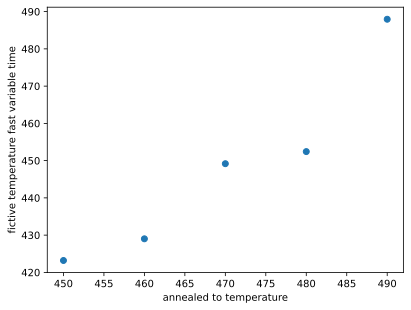

In [77]:
plt.scatter(temp, fictive_temp_fast_variable)
plt.xlabel("annealed to temperature")
plt.ylabel("fictive temperature fast variable time")
plt.show()

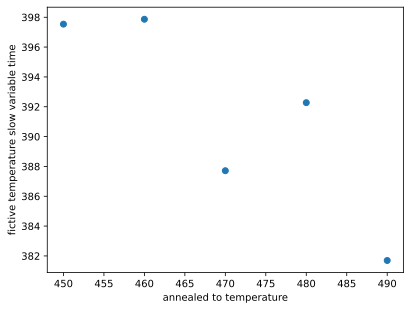

In [78]:
plt.scatter(temp, fictive_temp_slow_variable)
plt.xlabel("annealed to temperature")
plt.ylabel("fictive temperature slow variable time")
plt.show()

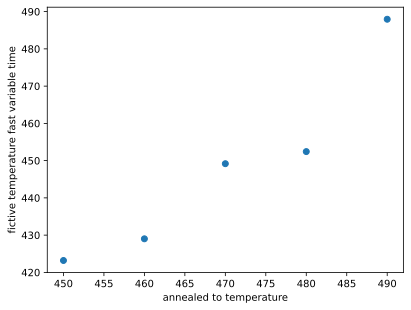

In [79]:
plt.scatter(temp, fictive_temp_fast_variable)
plt.xlabel("annealed to temperature")
plt.ylabel("fictive temperature fast variable time")
plt.show()

In [80]:
init_cond = [v490["R1_cond_o"],v480["R1_cond_o"],v470["R1_cond_o"],v460["R1_cond_o"],v450["R1_cond_o"]]
activation_energy = [v490["R1_activation"],v480["R1_activation"],v470["R1_activation"],v460["R1_activation"],v450["R1_activation"]]

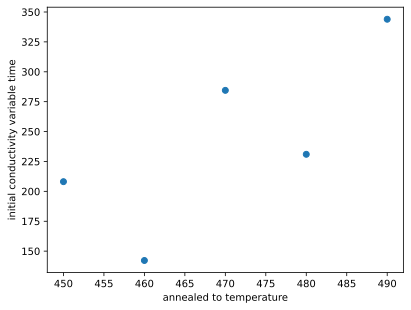

In [81]:
plt.scatter(temp, init_cond)
plt.xlabel("annealed to temperature")
plt.ylabel("initial conductivity variable time")
plt.show()

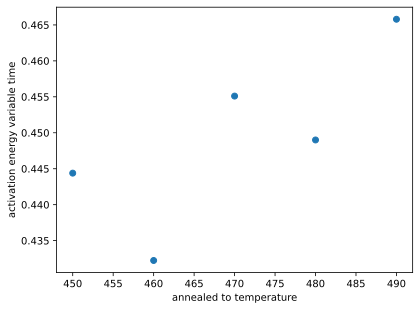

In [82]:
plt.scatter(temp, activation_energy)
plt.xlabel("annealed to temperature")
plt.ylabel("activation energy variable time")

plt.show()

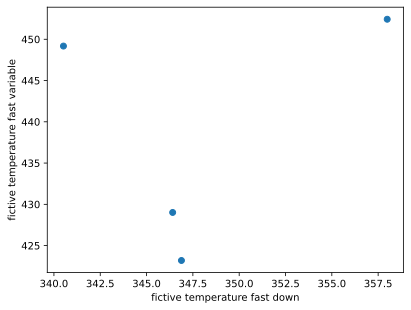

In [83]:
plt.scatter(fictive_temp_fast_down, fictive_temp_fast_variable[1:])
plt.xlabel("fictive temperature fast down")
plt.ylabel("fictive temperature fast variable")
plt.show()

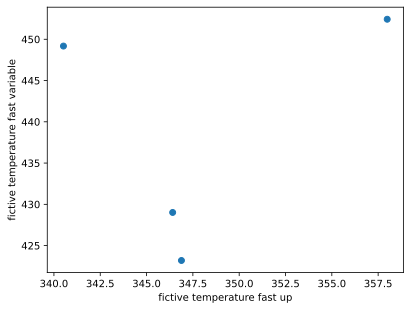

In [84]:
plt.scatter(fictive_temp_fast_up, fictive_temp_fast_variable[1:])
plt.xlabel("fictive temperature fast up")
plt.ylabel("fictive temperature fast variable")
plt.show()

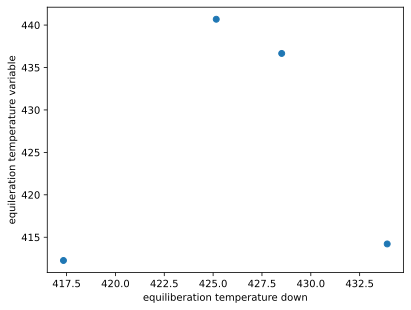

In [85]:
plt.scatter(equiliberation_temp_down, equiliberation_temp_variable[1:])
plt.xlabel("equiliberation temperature down")
plt.ylabel("equileration temperature variable")
plt.show()

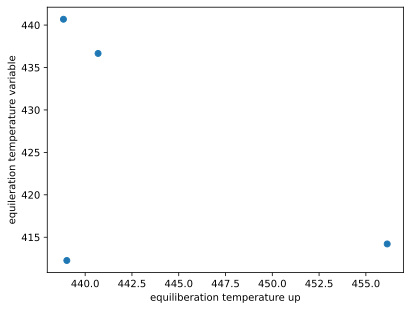

In [86]:
plt.scatter(equiliberation_temp_up, equiliberation_temp_variable[1:])
plt.xlabel("equiliberation temperature up")
plt.ylabel("equileration temperature variable")
plt.show()

here are the commonalities and differneces:

|                    | Annealed to | Equilibration Temperature at | Activation Energy in Thermally Independent Region |
|--------------------|-------------|------------------------------|---------------------------------------------------|
| Common literature  | 480K        | 443.15K                      | 0.36eV                                            |
| Brenda             | 470K        | 435K                         | 0.45eV                                            |
| My experiment at 490     | 490K        | 454.54K                      | 0.49eV                                            |
| My experiment at 470     | 470K        | 432.21K                      | 0.479eV                                            |


Despite the commonalities and differences, one thing is defintely different i.e. the other curves are concave up for both slow and fast cool. 

My curve is concave down, which is a major concern and is very deviant from what is expected.